# Hellinger Distance
## The Hellinger distance is used to quantify the similarity between two probability distributions. It is a bounded metric that measures the cumulative difference in density over all points in a probability space.

$ H(P,Q) = \frac{1}{\sqrt{2}} \sqrt{ \sum^k_{i-1}(\sqrt{p_i}-\sqrt{q_i})^2 } $

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

## Time and Date of the experiment

In [3]:
print(ib.date)

2021-04-03 02:21:22.844601


## Load estimated and true posterior probabilities

In [4]:
#convenient method to load everything
ib.load_all()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded


## Compute hellinger distance between estimated and true posteriors

In [5]:
ib.get_hellinger()

## Saves current hellinger distance

In [7]:
ib.load_hellinger(save=True)

saving current attributes..
completed after 0 seconds
saved as [ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ]


Loads previously stored hellinger distance from `"clf/HellingerData.pickle"`

In [6]:
ib.load_hellinger()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded


In [9]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

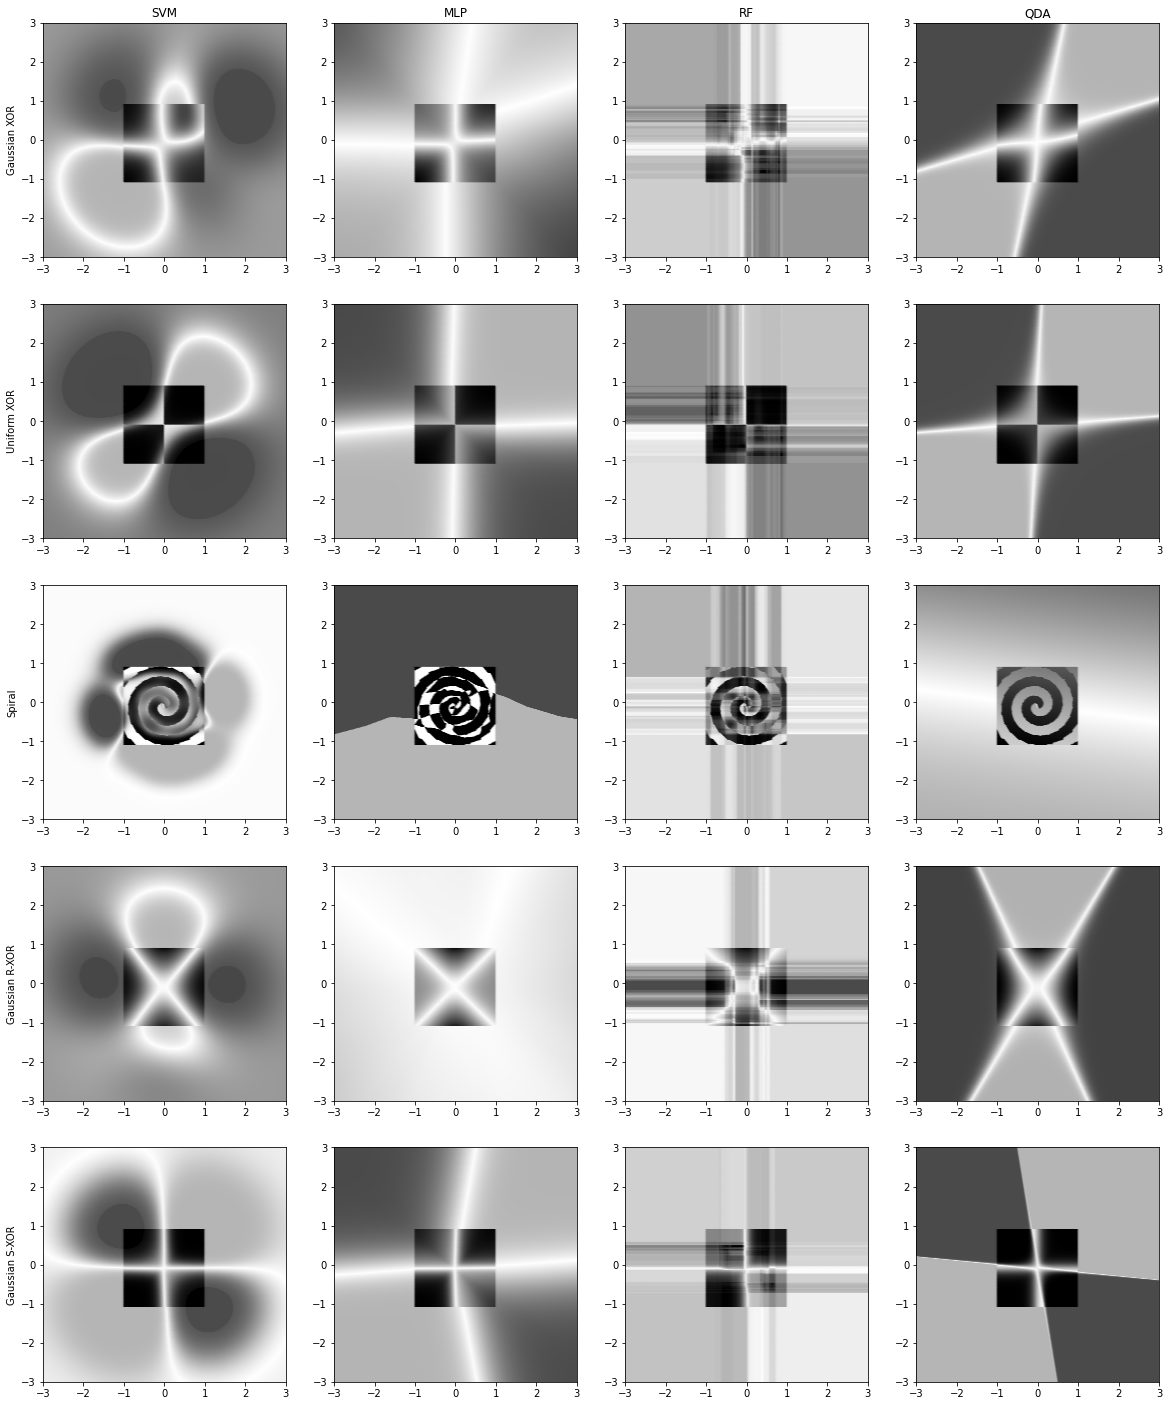

In [10]:
fig, axs = plt.subplots(5,4, figsize=(5*4, 5*5))
for j in tqdm(range(5)):
    for i in tqdm(range(4), leave=False):
        if j == 0:
            axs[j][i].set_title(ib.mtype[i])
        if i == 0:
            axs[j][i].set_ylabel(ib.dtype[j])

        axs[j][i].scatter(x=ib.mask[:,0], y=ib.mask[:,1],c=ib.hdist[0][j][i], cmap='binary')
        axs[j][i].set_xlim([-3,3])
        axs[j][i].set_ylim([-3,3])

plt.savefig(f'figs/[hellinger]_hellinger_sqbbox_{str(ib.date.date())}.png', bbox_inches='tight')